<a href="https://colab.research.google.com/github/young917/CIFAR10/blob/master/20171697.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Activation
from keras.layers import Conv2D, MaxPooling2D
from keras import backend as K
from keras.utils.vis_utils import model_to_dot
from IPython.display import SVG
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sns
from keras import regularizers
from keras.preprocessing.image import ImageDataGenerator

In [0]:
def plot_images(x, y_true, y_pred=None, size=(5, 5)):
    assert len(x) == len(y_true) == size[0] * size[1]
    
    fig, axes = plt.subplots(size[0], size[1])
    fig.subplots_adjust(hspace=0.5, wspace=0.1)

    for i, ax in enumerate(axes.flat):
        if x[i].shape[-1] == 1:
            ax.imshow(x[i].reshape(x[i].shape[0], x[i].shape[1]))
        else:
            ax.imshow(x[i])

        if y_pred is None:
            xlabel = "True: {0}".format(y_true[i].argmax())
        else:
            xlabel = "True: {0}, Pred: {1}".format(y_true[i].argmax(), 
                                                   y_pred[i].argmax())

        ax.set_xlabel(xlabel)
        
        ax.set_xticks([])
        ax.set_yticks([])

    plt.show()

## Load Data Set

x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


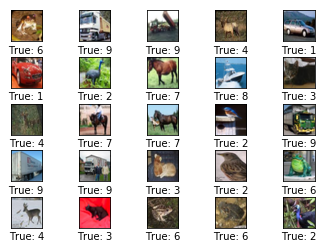

In [0]:
batch_size = 128
num_classes = 10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

if len(x_train.shape) < 4:
    x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], x_train.shape[2], 1)
    x_test = x_test.reshape(x_test.shape[0], x_train.shape[1], x_train.shape[2], 1)
    
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')

y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)

plot_images(x_train[:25], y_train[:25])

##Make Model

In [0]:
weight_decay = 1e-4

model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu', input_shape=x_train.shape[1:]))
model.add(Conv2D(32, kernel_size=(3, 3), padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(64, (3, 3) , padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
model.add(Conv2D(64, (3, 3) , padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))

model.add(Conv2D(128, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
model.add(Conv2D(128, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(weight_decay), activation='relu'))
model.add(MaxPooling2D(pool_size = (2,2)))
model.add(Dropout(1 - 0.7))
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(1 - 0.5))
model.add(Dense(num_classes, activation='softmax'))

## Visualization the model

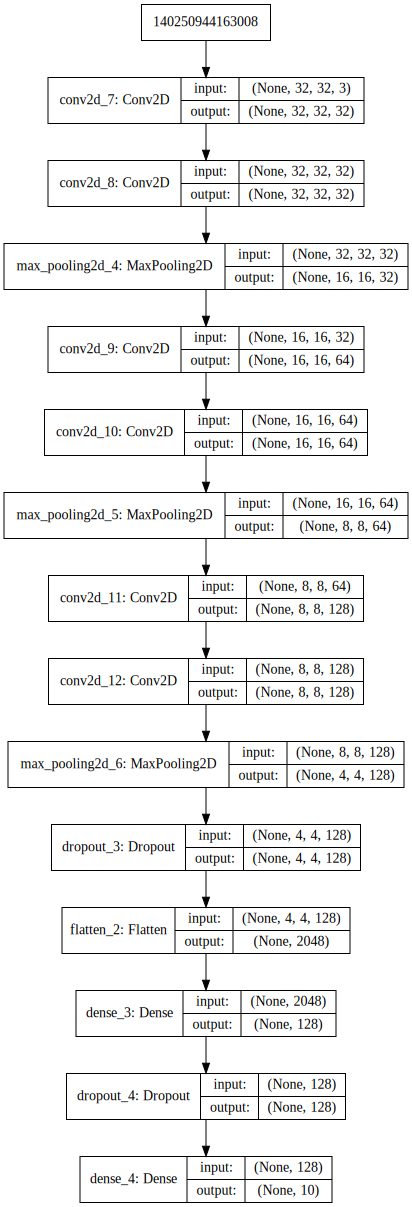

In [0]:
SVG(model_to_dot(model, show_shapes=True).create(prog='dot', format='svg'))

## Training model

In [0]:
datagen = ImageDataGenerator( rotation_range=10,
                 width_shift_range=0.01, height_shift_range=0.01,
                 shear_range = 0.03, zoom_range = 0.03,
                 horizontal_flip=True, fill_mode = 'nearest')
datagen.fit(x_train)

In [0]:
opt_rms = keras.optimizers.rmsprop(lr=0.0003,decay=1e-6)

model.compile(loss=keras.losses.categorical_crossentropy, 
              optimizer=opt_rms, 
              metrics=['accuracy'])

model.fit_generator(datagen.flow(x_train, y_train, batch_size=batch_size),\
                    steps_per_epoch=x_train.shape[0] // batch_size,epochs=40,\
                    verbose=1,validation_data=(x_test,y_test))

Instructions for updating:
Use tf.cast instead.
Epoch 1/40
390/390 [==============================] - 25s 64ms/step - loss: 1.9548 - acc: 0.2939 - val_loss: 1.6058 - val_acc: 0.4290
Epoch 2/40
390/390 [==============================] - 22s 55ms/step - loss: 1.6463 - acc: 0.4152 - val_loss: 1.5459 - val_acc: 0.4391
Epoch 3/40
390/390 [==============================] - 22s 56ms/step - loss: 1.4889 - acc: 0.4742 - val_loss: 1.3102 - val_acc: 0.5309
Epoch 4/40
390/390 [==============================] - 22s 56ms/step - loss: 1.3786 - acc: 0.5160 - val_loss: 1.2145 - val_acc: 0.5761
Epoch 5/40
390/390 [==============================] - 22s 55ms/step - loss: 1.2813 - acc: 0.5577 - val_loss: 1.1917 - val_acc: 0.5919
Epoch 6/40
390/390 [==============================] - 22s 55ms/step - loss: 1.1986 - acc: 0.5907 - val_loss: 1.1449 - val_acc: 0.6121
Epoch 7/40
390/390 [==============================] - 22s 56ms/step - loss: 1.1282 - acc: 0.6163 - val_loss: 0.9745 - val_acc: 0.6674
Epoch 8/40
390

## Evaulating the model

In [0]:
score = model.evaluate(x_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.5544531461715698
Test accuracy: 0.8382


## Prediction the model

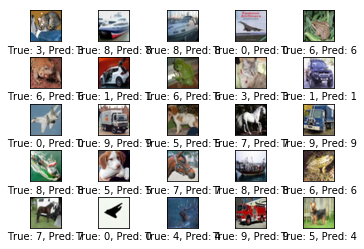

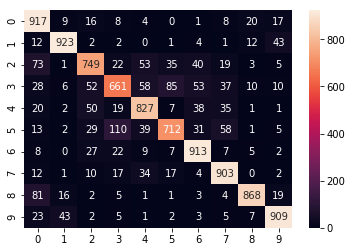

In [0]:
y_pred = model.predict(x_test)

plot_images(x=x_test[:25], y_true=y_test[:25], y_pred=y_pred[:25])

y_result = confusion_matrix(y_test.argmax(axis=1), y_pred.argmax(axis=1))
sns.heatmap(pd.DataFrame(y_result, range(10), range(10)), annot=True, fmt='g')